# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score #plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Loading Dataset

In [4]:
sheet_name = 'Complete_case'
df = pd.read_excel('01_datasets.xlsx',sheet_name=sheet_name)
df.head()

,age,blood pressure,specific gravity,albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Hemoglobin,Packed Cell Volume,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,80,1.020,1,0,normal,notpresent,notpresent,121,36.0,1.2,15.4,44,yes,yes,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,notpresent,notpresent,423,53.0,1.8,9.6,31,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,abnormal,present,notpresent,117,56.0,3.8,11.2,32,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,notpresent,notpresent,106,26.0,1.4,11.6,35,no,no,no,good,no,no,ckd
4,68,70,1.010,0,0,normal,notpresent,notpresent,100,54.0,24.0,12.4,36,no,no,no,good,no,no,ckd


# Exploratory Data Analysis

### Looking at the class distribution

<Axes: xlabel='Class ', ylabel='count'>

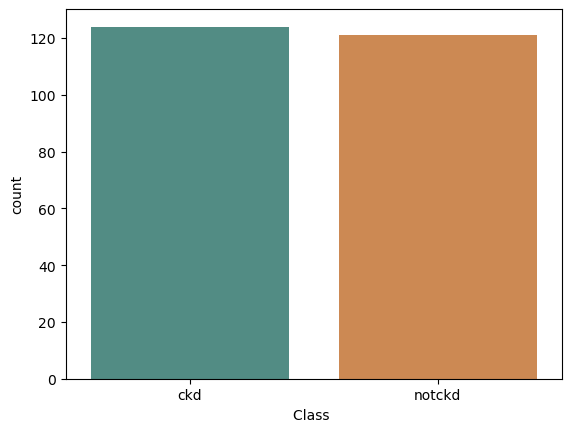

In [7]:
sns.countplot(data = df, x = 'Class ', palette = ['#49958B', '#E0873F'])

### Count plot of Appetite with hue as Class

<Axes: xlabel='Appetite', ylabel='count'>

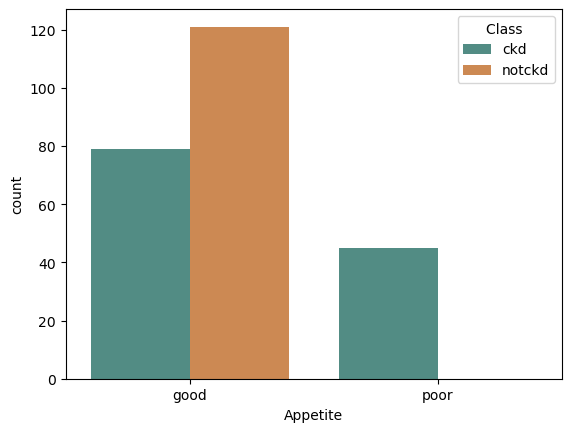

In [8]:
sns.countplot(data = df, x = 'Appetite', hue = 'Class ', palette = ['#49958B', '#E0873F'])

### Count plot of Diabetes Mellitus with hue as Class

<Axes: xlabel='Diabetes Mellitus', ylabel='count'>

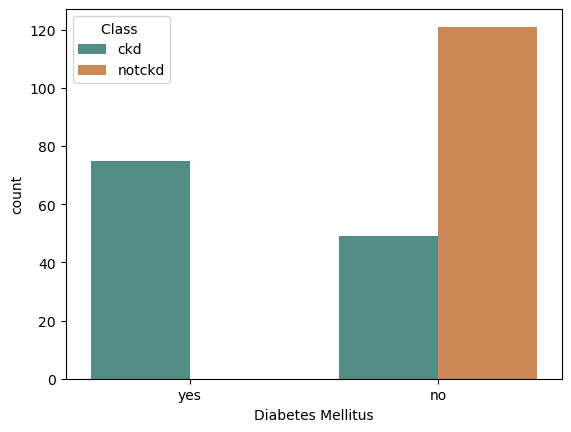

In [9]:
sns.countplot(data = df, x = 'Diabetes Mellitus', hue = 'Class ', palette = ['#49958B', '#E0873F'])

### Count plot of Specific Gravity with hue as Class

<Axes: xlabel='specific gravity', ylabel='count'>

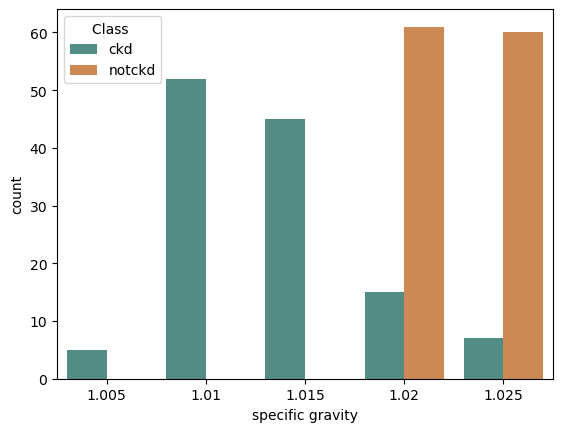

In [10]:
sns.countplot(data = df, x = 'specific gravity', hue = 'Class ', palette = ['#49958B', '#E0873F'])

### Checking data type of each Feature

In [11]:
feature_type = {}
for columns in df.columns:
    print(columns, ':', df[columns].dtype)
    feature_type[columns] = str(df[columns].dtype)

age : int64
blood pressure : int64
specific gravity : float64
albumin : int64
Sugar : int64
Pus Cell : object
Pus Cell clumps : object
Bacteria : object
Blood Glucose Random : int64
Blood Urea : float64
Serum Creatinine : float64
Hemoglobin : float64
Packed  Cell Volume : int64
Hypertension : object
Diabetes Mellitus : object
Coronary Artery Disease : object
Appetite : object
Pedal Edema : object
Anemia : object
Class  : object


# Pre Processing

### Converting categorical features to dummy variables

In [12]:
other_cat_features = ['specific gravity', 'albumin', 'Sugar', 'Red Blood Cells(nominal)']

In [13]:
#Dropping original categorical columns
for feature in feature_type:
    if (feature_type[feature] == 'object' and feature != 'Class ') or (feature in other_cat_features):
        dummies = pd.get_dummies(df[feature])
        for columns in dummies.columns:
            df[f'{feature}_{columns}'] = dummies[columns]
        
        df.drop(columns=[feature], inplace=True)